# Introduction

This notebook is meant to serve as a small example project of how to get data from the web using Python. Here we will scrape the data from the web, parse the results using regular expressions, and visualize the data. This small project could probably be done a lot more efficiently by hand, but the ideas here are powerful and can be extended to much larger applications. There are many tools that a data scientist will need to use, and web scraping, regular expressions, and visualization are all good techniques to practice! 

# Web Scraping Using Requests and Beautiful Soup (bs4)

In [1]:
# requests for fetching html of website
import requests

# Make the request to a url
response = requests.get('http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html')


In [2]:
response.status_code

200

In [3]:
from bs4 import BeautifulSoup

# Create soup from content of request
cont = response.content
soup = BeautifulSoup(cont)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/nbuser/anaconda3_420/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [4]:
type(soup)

bs4.BeautifulSoup

We can find an element on the page by inspecting the page (right click and hit inspect element). We then use a series of HTML selectors to find the appropriate tags which contain the content we are interested in. The next code block finds the main text of the entire article. We will then further subset the text to the relevant table and save it as a text object. 

In [5]:
# Find the element on the webpage
main_content = soup.find('div', attrs = {'class': 'entry-content'})
main_content

<div class="entry-content" id="entryContent">
<p>CLEVELAND, Ohio - <a href="http://www.case.edu/">Case Western Reserve University </a>President Barbara Snyder's $700,312 base pay and $175,000 bonus in 2015 again made her the highest paid private college leader in Ohio, according to an annual report.</p>
<p>Nationally, Snyder's total compensation of $1.154 million, which can include deferred compensation and other pay, ranked 41st out of 541 presidents of private colleges according to the report by the <a href="http://chronicle.com/">Chronicle of Higher Education.</a></p>
<p>She is among 58 presidents to earn $1 million or more. The previous year, 39 private college presidents earned more than $1 million.</p>
<p>The Chronicle's <a href="https://www.chronicle.com/interactives/executive-compensation#id=table_private_2015">compensation tables </a>come from a review of federal tax documents from the 2015 calendar year, the most recent available. </p>
<p>Former University of Dayton President

In [6]:
# Extract the relevant information
content = main_content.find('ul').text

import pprint
pprint.pprint(content)

('\n'
 'Grant Cornwell, College of Wooster (left in 2015): $911,651\n'
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913\n'
 'Mark Roosevelt, Antioch College, (left in 2015): $507,672\n'
 'Laurie Joyner, Wittenberg University (left in 2015): $463,504\n'
 'Richard Giese, University of Mount Union (left in 2015): $453,800\n'
 'Sean Decatur,Kenyon College: $451,698\n'
 'Adam Weinberg, Denison University: $435,322\n'
 'Daniel Dibiasio, Ohio Northern University: $414,716\n'
 'Denvy Bowman, Capital University (left in 2016): $388,570\n'
 'Anne Steele, Muskingum University (left in 2016): $384,233\n'
 'Kathy Krendl, Otterbein University: \xa0$378,035\n'
 'Rockwell Jones, Ohio Wesleyan University: $366,625\n'
 'Robert Helmer, Baldwin Wallace University: $365,616\n'
 'Robert Huntington, Heidelberg University: $300,005\n'
 'Lori Varlotta, Hiram College: $293,336\n'
 'Joseph Bruno, Marietta College (left in 2016): $288,295\n'
 'W. Richard Merriman Jr., University of Mount Union (star

We know have the data we need to focus on as a text string. The next step is to parse this information using regular expressions to identify the presidents, colleges, and salaries. Regular Expressions are intimidating at first, and require practice to learn to use effectively. I am definitely not an expert, and am using this project partly to get more familiar with regular expressions. The best place to get started is simply with the [Python Documentation](https://docs.python.org/3/library/re.html) for the `re` library.

# Regular Expressions Using `re`

## Presidents

First we want to extract the names of the presidents. We do this taking advantage of the fact that the names come at the beginning of each newline. We therefore use an expression in the multiline mode, which treats every newline character as the end of the string (so the next character is the start of a string). The names also all end with a comma, so we can use this to bound the names. 

In [7]:
import re

# Create a pattern to match names
name_pattern = re.compile(r'^([A-Z]{1}.+?)(?:,)', flags = re.M)
name_pattern.findall(content)

['Grant Cornwell',
 'Marvin Krislov',
 'Mark Roosevelt',
 'Laurie Joyner',
 'Richard Giese',
 'Sean Decatur',
 'Adam Weinberg',
 'Daniel Dibiasio',
 'Denvy Bowman',
 'Anne Steele',
 'Kathy Krendl',
 'Rockwell Jones',
 'Robert Helmer',
 'Robert Huntington',
 'Lori Varlotta',
 'Joseph Bruno',
 'W. Richard Merriman Jr.']

In [8]:
names = name_pattern.findall(content)

## Colleges

The next piece of information to extract is the name of the schools. We can use the fact that each school name is preceded either by a comma (Kenyon College) or a comma and a space (I don't think this was intentional, but we can handle it). Each school name ends with a colon `:` or with a space and a left parenthesis ` (` or with a comma `,`. We use both of these to bound the college expression and extract the useful information. 

In [9]:
# Remind ourselves what our soup looks like
pprint.pprint(content)

('\n'
 'Grant Cornwell, College of Wooster (left in 2015): $911,651\n'
 'Marvin Krislov, Oberlin College (left in 2016): \xa0$829,913\n'
 'Mark Roosevelt, Antioch College, (left in 2015): $507,672\n'
 'Laurie Joyner, Wittenberg University (left in 2015): $463,504\n'
 'Richard Giese, University of Mount Union (left in 2015): $453,800\n'
 'Sean Decatur,Kenyon College: $451,698\n'
 'Adam Weinberg, Denison University: $435,322\n'
 'Daniel Dibiasio, Ohio Northern University: $414,716\n'
 'Denvy Bowman, Capital University (left in 2016): $388,570\n'
 'Anne Steele, Muskingum University (left in 2016): $384,233\n'
 'Kathy Krendl, Otterbein University: \xa0$378,035\n'
 'Rockwell Jones, Ohio Wesleyan University: $366,625\n'
 'Robert Helmer, Baldwin Wallace University: $365,616\n'
 'Robert Huntington, Heidelberg University: $300,005\n'
 'Lori Varlotta, Hiram College: $293,336\n'
 'Joseph Bruno, Marietta College (left in 2016): $288,295\n'
 'W. Richard Merriman Jr., University of Mount Union (star

In [10]:
# Make school patttern and examine results
school_pattern = re.compile(r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)')
school_pattern.findall(content)

['College of Wooster',
 'Oberlin College',
 'Antioch College',
 'Wittenberg University',
 'University of Mount Union',
 'Kenyon College',
 'Denison University',
 'Ohio Northern University',
 'Capital University',
 'Muskingum University',
 'Otterbein University',
 'Ohio Wesleyan University',
 'Baldwin Wallace University',
 'Heidelberg University',
 'Hiram College',
 'Marietta College',
 'University of Mount Union']

In [11]:
# Extract the schools
schools = school_pattern.findall(content)

## Salaries

Finally, we need to get the salaries. This is relatively easy because all of the salaries are preceded by a dollar sign. Once we have extract the salaries as strings, we can use a Python list comprehension to remove the $ , and convert the string to a float. This uses a few Python shortcuts, and I like how elegant the list comprehension is. Writing Python can really a joy! 

In [12]:
# Pattern to match the salaries
salary_pattern = re.compile(r'\$.+')
salary_pattern.findall(content)

['$911,651',
 '$829,913',
 '$507,672',
 '$463,504',
 '$453,800',
 '$451,698',
 '$435,322',
 '$414,716',
 '$388,570',
 '$384,233',
 '$378,035',
 '$366,625',
 '$365,616',
 '$300,005',
 '$293,336',
 '$288,295',
 '$221,761']

### Converting Dollar Strings to Numbers

First we can see a brief example of each of the steps in the list comprehension. We use the `split` method to split each string into two separate strings at the comma (starting with the first character after the $). Then, we `join`, the two strings together with no separating character and convert the result to a float. All of this is wrapped in a list comprehension. The end result is a list of numeric values representing the Presidents' salaries.

In [13]:
# Messy salary
salary = '$876,001'

# Exclude the $ and split the string on the comma
salary[1:].split(',')

['876', '001']

In [14]:
# Same operation but now join the list with no space
''.join(salary[1:].split(','))

'876001'

In [15]:
# Finally convert the string to a float
float(''.join(salary[1:].split(',')))

876001.0

#### Example List Comprehension to Test Method

In [16]:
# Messy salaries
salaries = ['$876,001', '$543,903', '$2453,896']

# Convert salaries to numbers in a list comprehension 
[int(''.join(s[1:].split(','))) for s in salaries]

[876001, 543903, 2453896]

In [17]:
# Extract all the salaries and convert to integers
salaries = salary_pattern.findall(content)

# List comprehension to convert strings to floats
salaries = [int(''.join(s[1:].split(','))) for s in salaries]

In [18]:
salaries

[911651,
 829913,
 507672,
 463504,
 453800,
 451698,
 435322,
 414716,
 388570,
 384233,
 378035,
 366625,
 365616,
 300005,
 293336,
 288295,
 221761]

In [19]:
# Sanity check to make sure everything is correct!
len(names) == len(schools) == len(salaries)

True

# Visualization 

We will use the `matplotlib` and `seaborn` libraries for visualizing the results. `matplotlib` is great for creating quick visualizations, and I like the aesthetic style of `seaborn`. We'll start off by storing the data in a `pandas` dataframe, the common data structure of choice for data science.

Here I am manually adding in my President's information to the dataframe. Sometimes knowing when it is faster to just do something by hand rather than writing a complicated program is a vital skill in data science.

In [23]:
import pandas as pd

# Put information into a dataframe
df = pd.DataFrame({'salary': salaries, 
                   'President': names,
                   'College': schools})

# Append information
df.loc[17, :] = ['CWRU', 'Barbara Synder', 1154000]

# Sort the values by highest to lowest salary
df = df.sort_values('salary', ascending=False).reset_index().drop(['index'], axis=1)

In [24]:
df

,College,President,salary
0,CWRU,Barbara Synder,1154000.0
1,College of Wooster,Grant Cornwell,911651.0
2,Oberlin College,Marvin Krislov,829913.0
3,Antioch College,Mark Roosevelt,507672.0
4,Wittenberg University,Laurie Joyner,463504.0
5,University of Mount Union,Richard Giese,453800.0
6,Kenyon College,Sean Decatur,451698.0
7,Denison University,Adam Weinberg,435322.0
8,Ohio Northern University,Daniel Dibiasio,414716.0
9,Capital University,Denvy Bowman,388570.0


## Quick First Visualization

We can use plotting functionality built into pandas to rapidly create an initial figure. This at least conveys the information although it does not look very nice! 

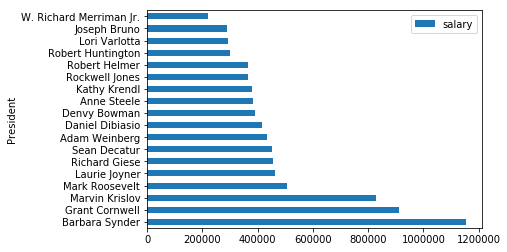

In [26]:
%matplotlib inline
df.plot(kind='barh', x = 'President', y = 'salary');

## Improve the Plot

Now comes an iterative procedure of improving the graphic. A lot of this involves using Stack Overflow and the [seaborn documentation](https://seaborn.pydata.org/generated/seaborn.barplot.html) to figure out how to make the plot look exactly like we want it. Plotting syntax often is pretty complicated, but don't worry about the specifics. You will always be able to look these up or build on old plots you or others made.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pick a style
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 16

# Sort the values by highest to lowest salary
df = df.sort_values('salary', ascending=False).reset_index()

# Shorten this one name for plotting
df.ix[df['College'] == 'University of Mount Union', 'College'] = 'Mount Union'

/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_420/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


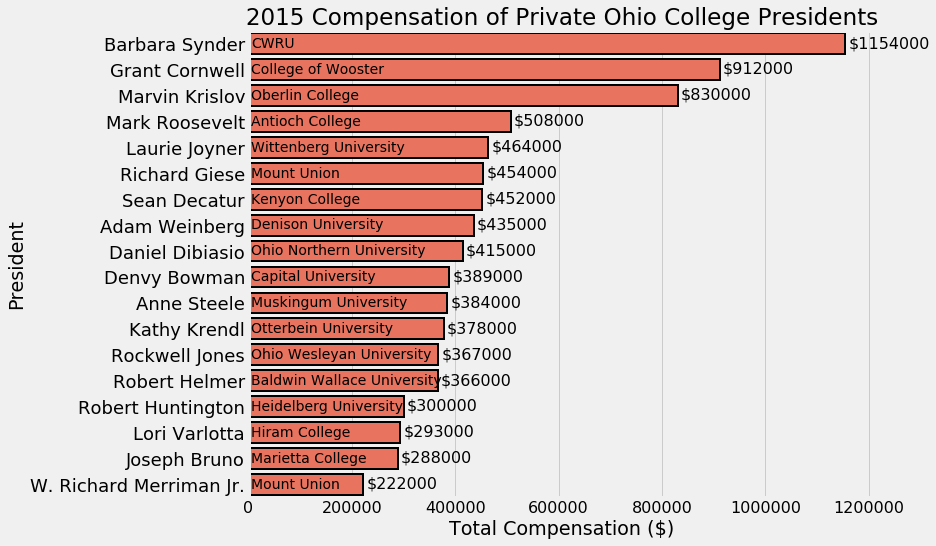

In [28]:
# Create the basic figure
plt.figure(figsize=(10, 8))
sns.barplot(x = 'salary', y = 'President', data = df, 
            color = 'tomato', edgecolor = 'k', linewidth = 2)

# Add text showing values and colleges
for i, row in df.iterrows():
    plt.text(x = row['salary'] + 6000, y = i + 0.15, s = '$%d' % (round(row['salary'] / 1000) * 1000))
    plt.text(x = 5000, y = i + 0.15, s = row['College'], size = 14)

# Labels are a must!
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Total Compensation ($)')
plt.ylabel('President') 
plt.title('2015 Compensation of Private Ohio College Presidents');

In [29]:
# Calculate value of 5 minutes of your presidents time
five_minutes_fraction = 5 / (2000 * 60)
total_df = pd.DataFrame(df.groupby('College')['salary'].sum())
total_df['five_minutes_cost'] = round(total_df['salary'] * five_minutes_fraction)
total_df = total_df.sort_values('five_minutes_cost', ascending = False).reset_index()

total_df

,College,salary,five_minutes_cost
0,CWRU,1154000.0,48.0
1,College of Wooster,911651.0,38.0
2,Oberlin College,829913.0,35.0
3,Mount Union,675561.0,28.0
4,Antioch College,507672.0,21.0
5,Kenyon College,451698.0,19.0
6,Wittenberg University,463504.0,19.0
7,Denison University,435322.0,18.0
8,Ohio Northern University,414716.0,17.0
9,Muskingum University,384233.0,16.0


## Final Product

After several attempts (I have not shown all my failures along the way), we can create the final plot: how much are you paying for five minutes of your president's time. I wouldn't say the plot is production quality, but it is a good ending point for this project!

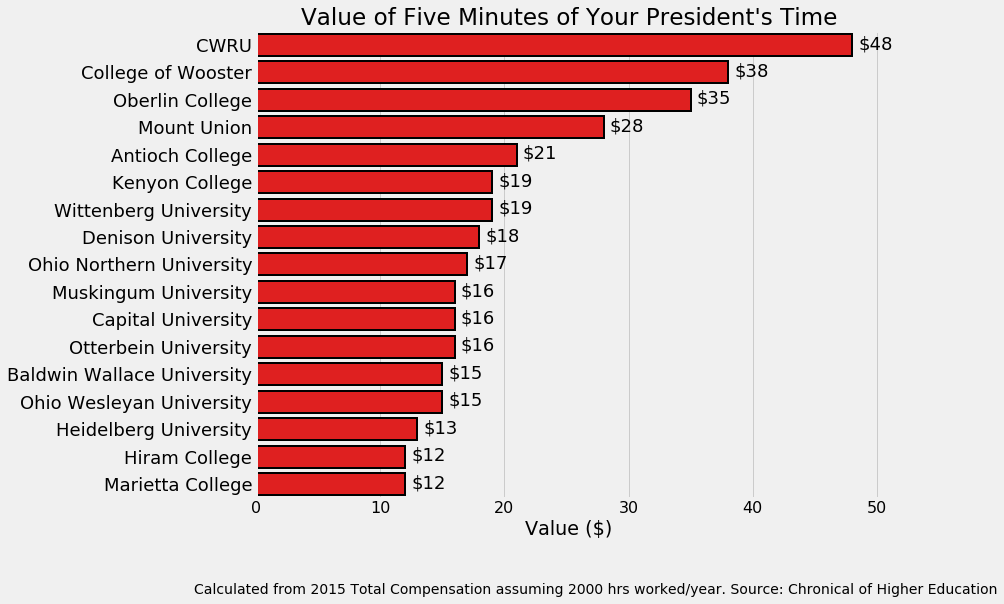

In [30]:
# Text for caption
txt = 'Calculated from 2015 Total Compensation assuming 2000 hrs worked/year. Source: Chronical of Higher Education'

# Create the basic barplot
plt.figure(figsize=(10, 8))
sns.barplot(x = 'five_minutes_cost', y = 'College', data = total_df, 
            color = 'red', edgecolor = 'k', linewidth = 2)

# Add the text with the value
for i, row in total_df.iterrows():
    plt.text(x = row['five_minutes_cost'] + 0.5, y = i + 0.15, 
           s = '$%d' % (row['five_minutes_cost']), size = 18)

# Add the caption
plt.text(x = -5, y = 20, s = txt, size = 14)

# Add the labels
plt.xticks(size = 16); plt.yticks(size = 18)
plt.xlabel('Value ($)')
plt.ylabel('') 
plt.title("Value of Five Minutes of Your President's Time");